# Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.


# Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold


In [93]:
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os
from sklearn.model_selection import train_test_split
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [29]:
df=pd.read_csv("avocado.csv")
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Checking for nulls

In [9]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [44]:
# Converting date column to datetime
df['Date']=pd.to_datetime(df['Date'])

# Exploratory Data Analysis

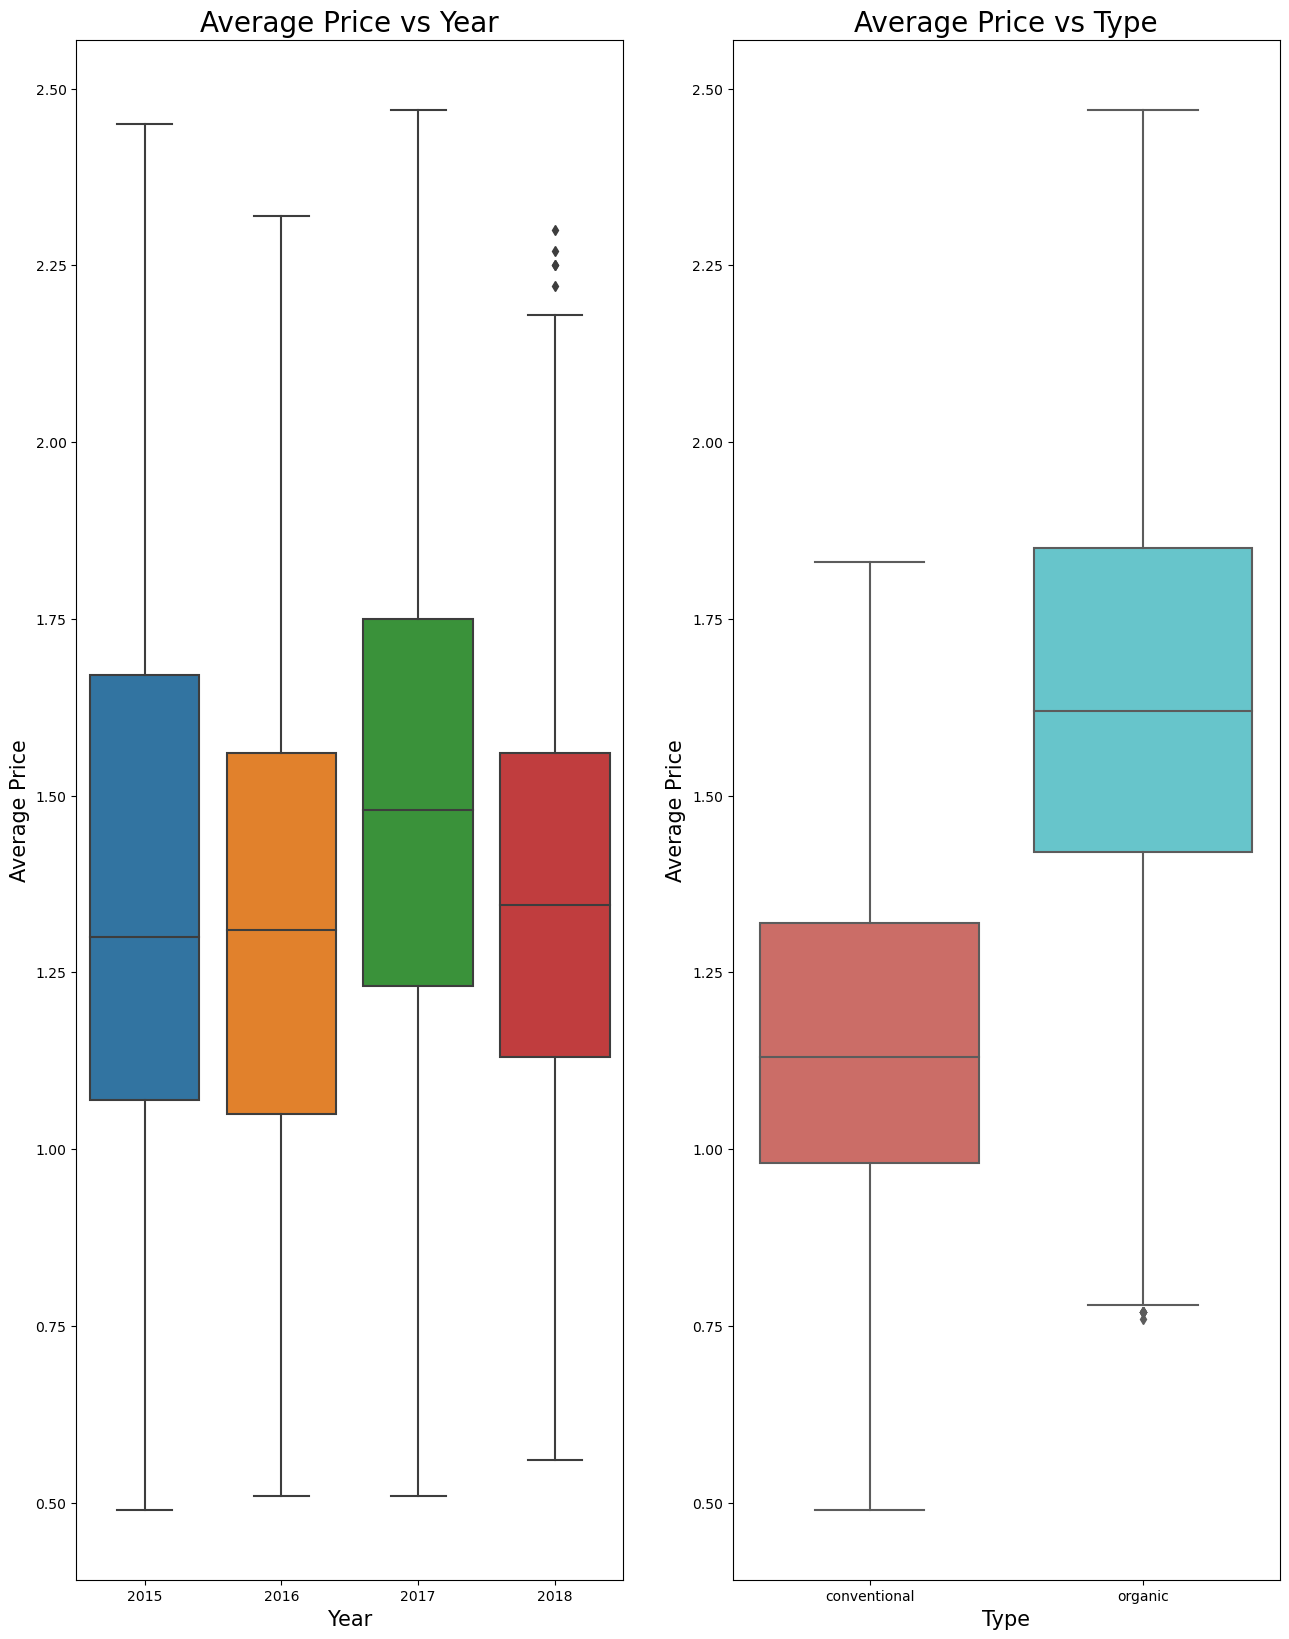

In [38]:
plt.figure(figsize=(24,20))
plt.subplot(1,3,1)
sns.boxplot(x='year',y='AveragePrice',data=df)
plt.title('Average Price vs Year',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average Price',fontsize=15)
plt.subplot(1,3,2)
sns.boxplot(x='type',y='AveragePrice',data=df,palette='hls')
plt.title('Average Price vs Type',fontsize=20)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Average Price',fontsize=15)
plt.show()

Inference: 
1) Average price was more in 2017 .
2) Average price of Organic type> Conventional

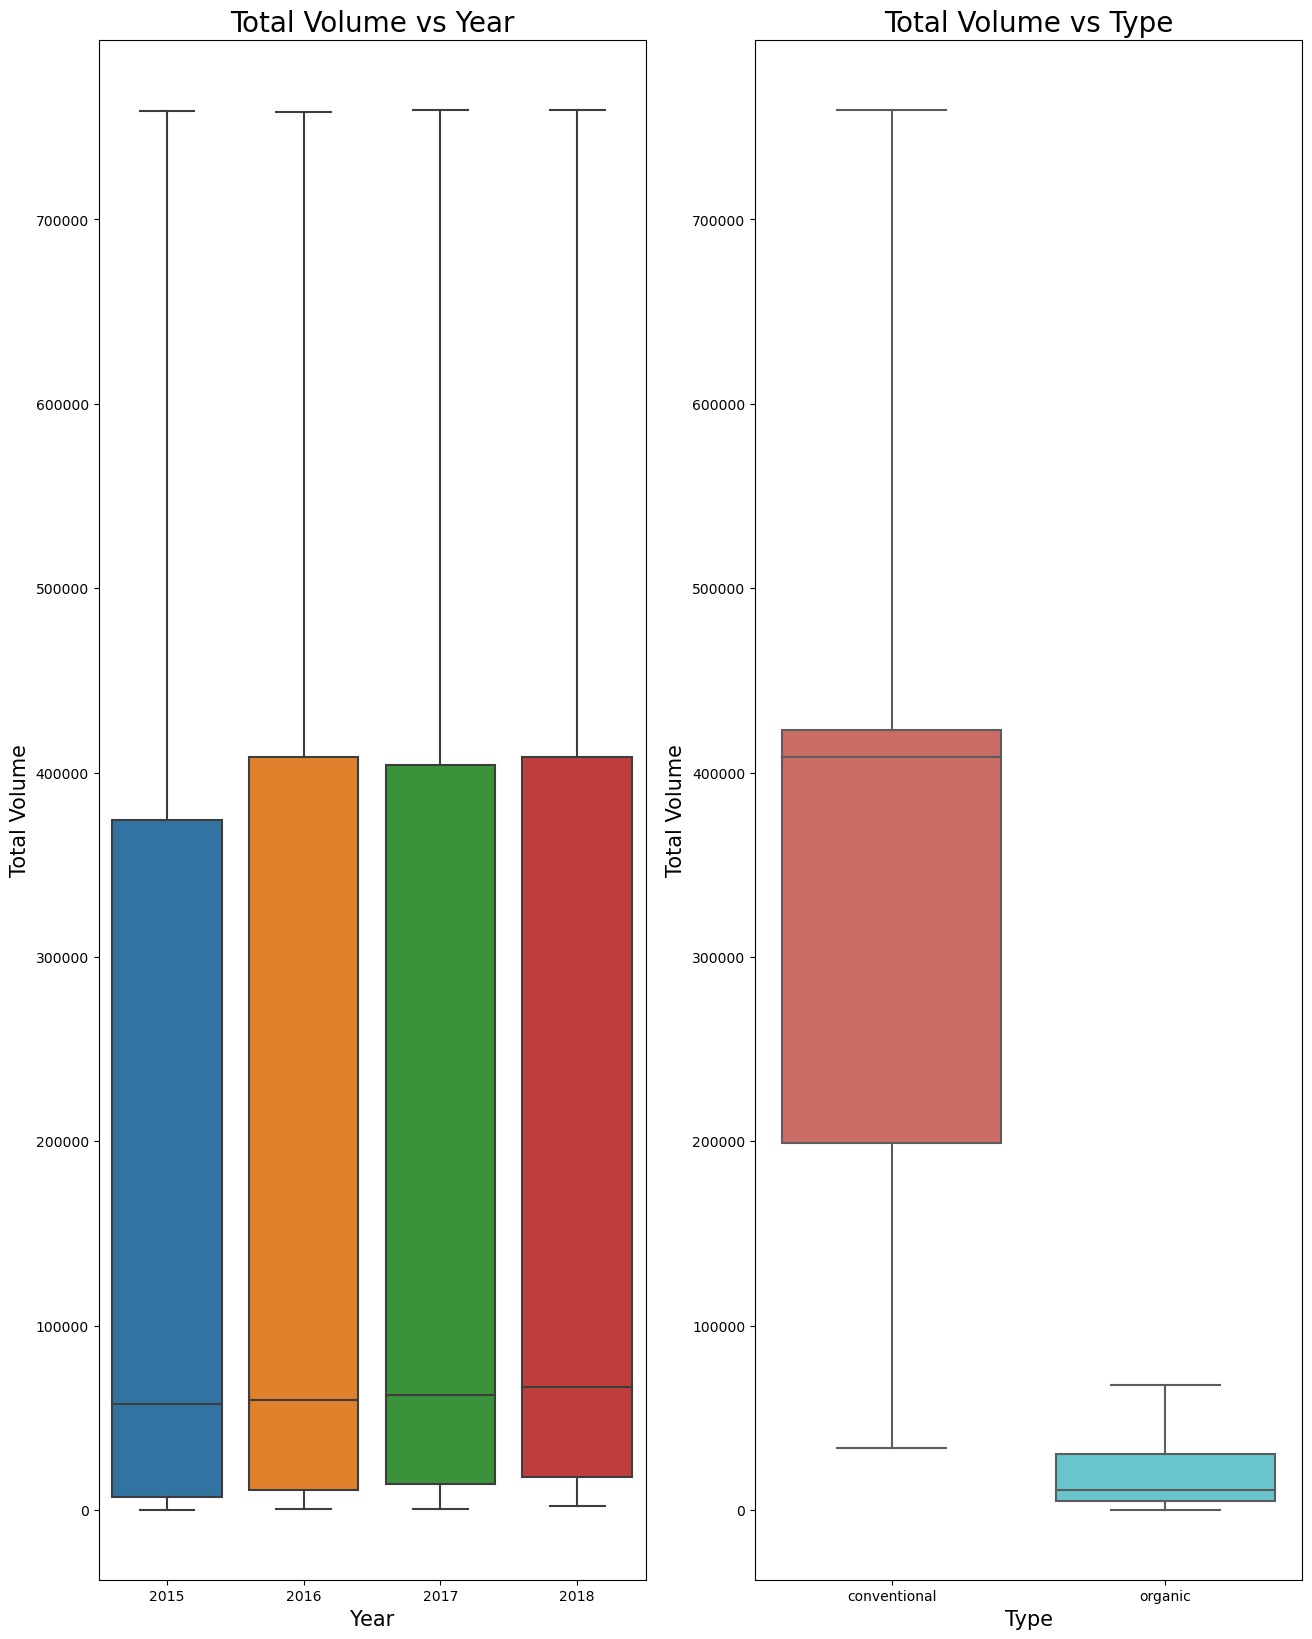

In [40]:
plt.figure(figsize=(24,20))
plt.subplot(1,3,1)
sns.boxplot(x='year',y='Total Volume',data=df)
plt.title('Total Volume vs Year',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Volume',fontsize=15)
plt.subplot(1,3,2)
sns.boxplot(x='type',y='Total Volume',data=df,palette='hls')
plt.title('Total Volume vs Type',fontsize=20)
plt.xlabel('Type',fontsize=15)
plt.ylabel('Total Volume',fontsize=15)
plt.show()

Inference: 
1) Average volume was same in all years
2) Total Volume Conventional> organic due to low average price

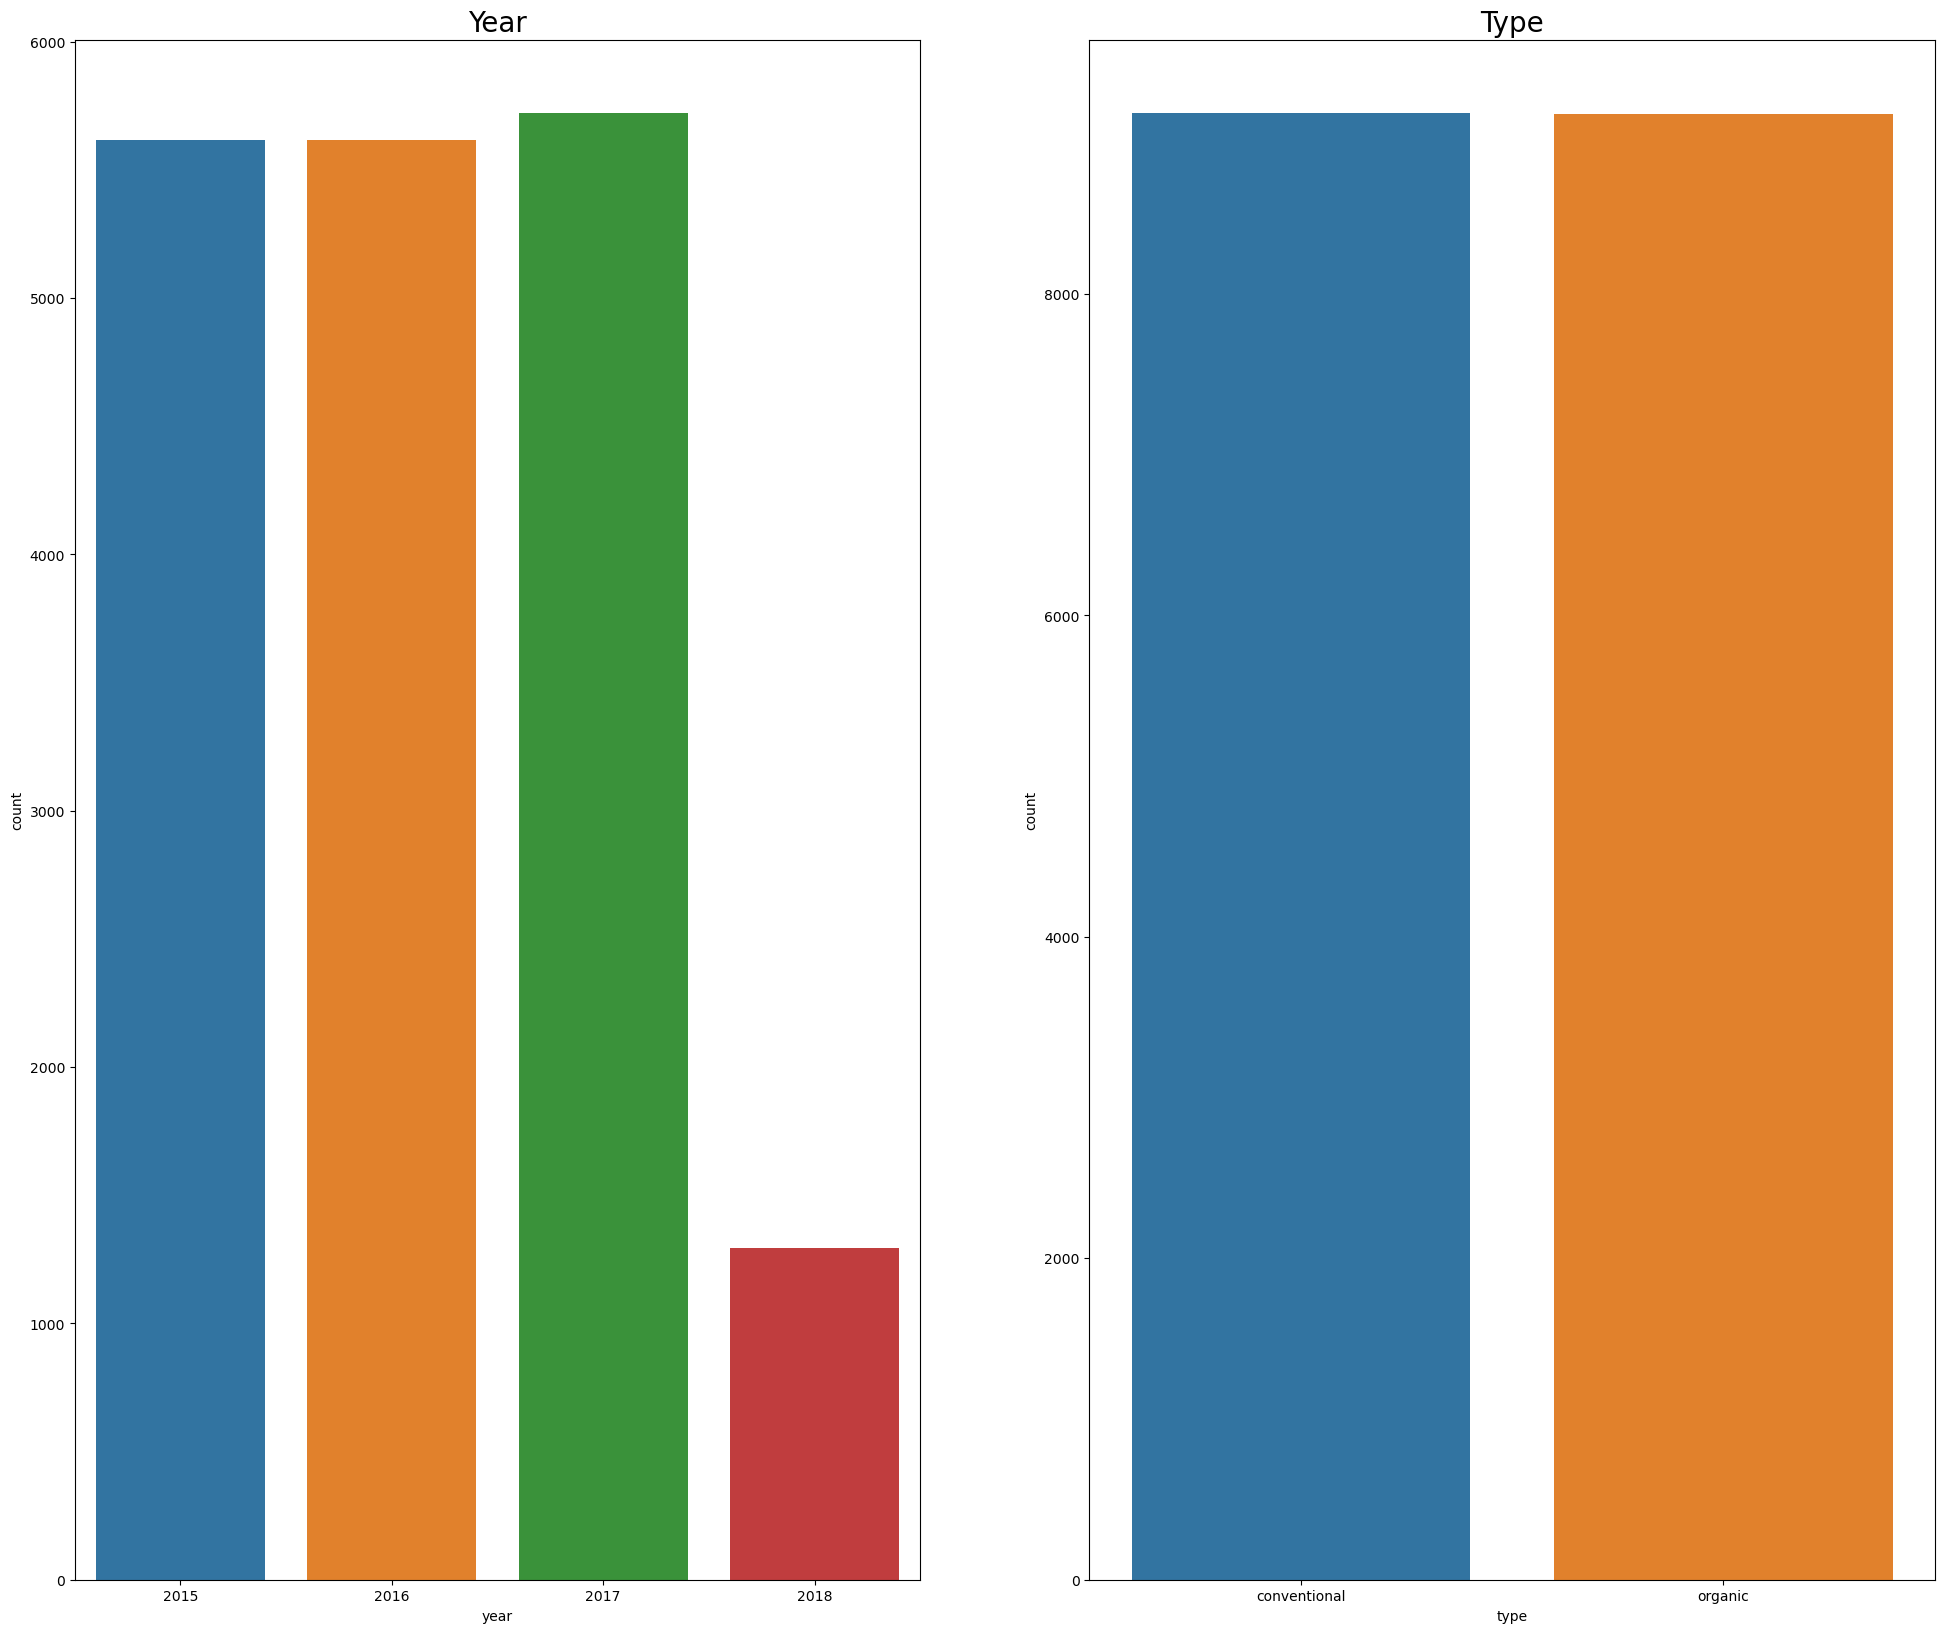

In [50]:
plt.figure(figsize=(24,20))
plt.subplot(1,2,1)
sns.countplot(x='year',data=df)
plt.title('Year',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x='type',data=df)
plt.title('Type',fontsize=20)
plt.show()

2018 alone has less data

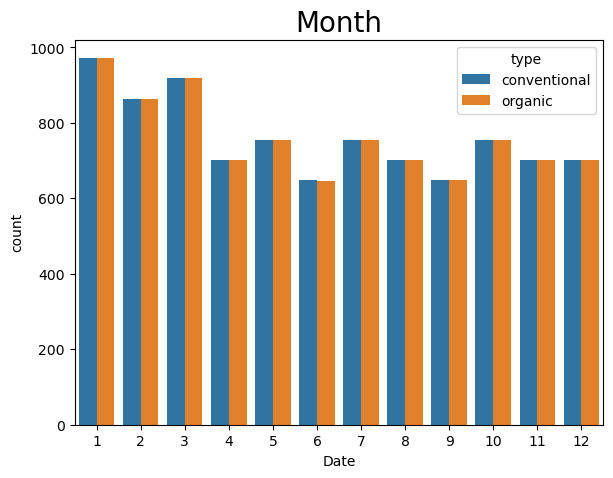

In [60]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=df.Date.dt.month,hue='type',data=df)
plt.title('Month',fontsize=20)

plt.show()

Avocado sales are more in the first few months of the year.Winter sales are more.

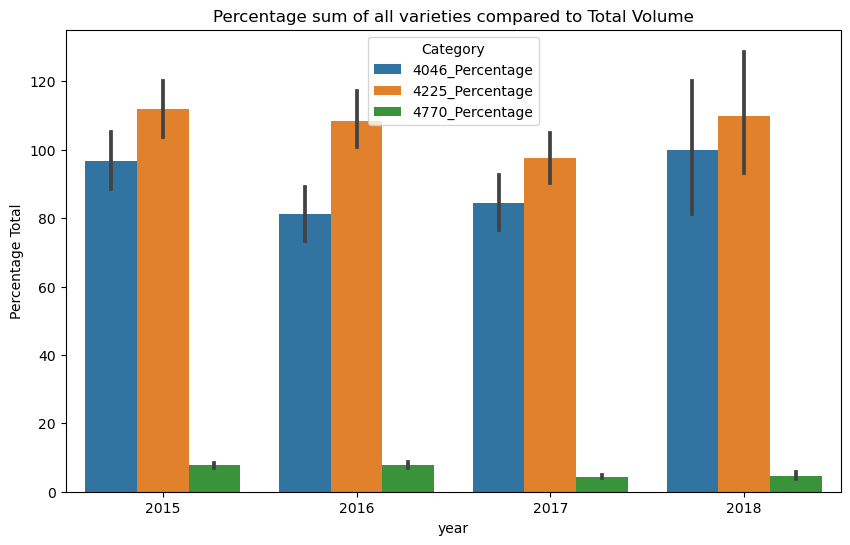

In [69]:
# Calculate percentages
df1=df
for col in ['4046', '4225', '4770']:
    df1[col + '_Percentage'] = df1[col] / df['Total Volume'] * 100

# Melt DataFrame to long format
df_melted = df.melt(id_vars=['year'], value_vars=['4046_Percentage', '4225_Percentage', '4770_Percentage'], 
                    var_name='Category', value_name='Percentage')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='year', y='Percentage', hue='Category')
plt.ylabel('Percentage Total')
plt.title('Percentage sum of all varieties compared to Total Volume')
plt.show()

4225 has largest percentage and 4770 has least percentage

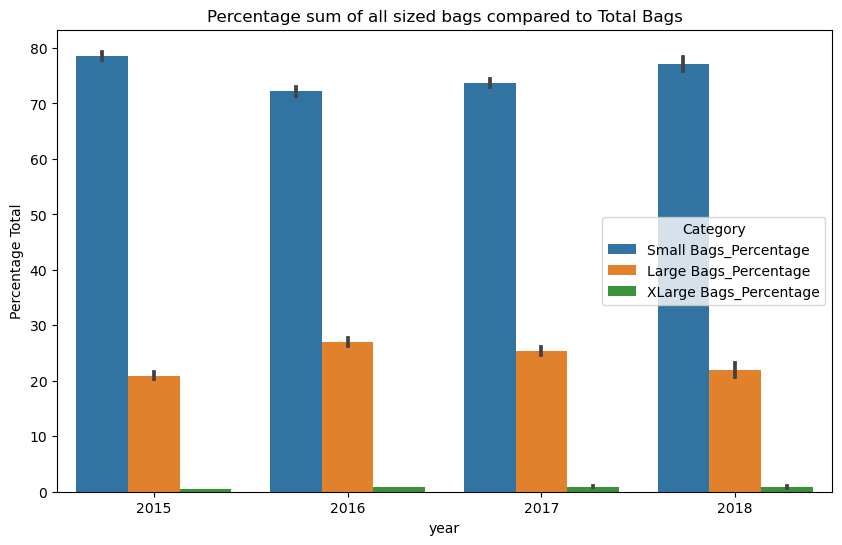

In [71]:
# Calculate percentages
df1=df
for col in ['Small Bags', 'Large Bags', 'XLarge Bags']:
    df1[col + '_Percentage'] = df1[col] / df['Total Bags'] * 100

# Melt DataFrame to long format
df_melted = df.melt(id_vars=['year'], value_vars=['Small Bags_Percentage', 'Large Bags_Percentage', 'XLarge Bags_Percentage'], 
                    var_name='Category', value_name='Percentage')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='year', y='Percentage', hue='Category')
plt.ylabel('Percentage Total')
plt.title('Percentage sum of all sized bags compared to Total Bags')
plt.show()

Small Bags are used more and X Large Bags are used less

In [55]:
df.region.nunique(),df.region.value_counts().unique()

(54, array([338, 335], dtype=int64))

There are 54 regions and almost all of them have 338 rows of data.

# Removing outliers 

In [39]:
def remove_outliers(df):
    # Step 1: Compute Q1 and Q3 for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    # Step 2: Compute IQR for each column
    IQR = Q3 - Q1
    
    # Step 3: Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Step 4: Replace outliers with nearest quartile value
    for col in ['AveragePrice','Total Volume']:
        df[col] = df[col].mask(df[col] < lower_bound[col], Q1[col]).mask(df[col] > upper_bound[col], Q3[col])
    
    return df
for i in ['conventional','organic']:
    df[df['type']==i]=remove_outliers(df[df['type']==i])


In [36]:
# Removing outliers from year 2016
df[df['year']==2016]=remove_outliers(df[df['year']==2016])
df=remove_outliers(df)

# Preprocessing 

In [74]:
# Removing unnecessary columns
# Drop columns ending with "Percentage" and dropping total volume and total bags because of their correlation with other columns
columns_to_drop = [col for col in df.columns if col.endswith('Percentage') or col.startswith('Total') ]
df.drop(columns=columns_to_drop,axis=1,inplace=True)
df.head()

,Date,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,conventional,2015,Albany


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   4046          18249 non-null  float64       
 3   4225          18249 non-null  float64       
 4   4770          18249 non-null  float64       
 5   Small Bags    18249 non-null  float64       
 6   Large Bags    18249 non-null  float64       
 7   XLarge Bags   18249 non-null  float64       
 8   type          18249 non-null  object        
 9   year          18249 non-null  int64         
 10  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 1.5+ MB


# Regression

Date,year,region,type are all categorical variables. Average Price is target variable.

In [79]:
le=LabelEncoder()
for col in ['Date','year','region','type']:
    df[col]=le.fit_transform(df[col])

In [80]:
# storing the Dependent Variables in X and Independent Variable in Y
x_reg=df.drop(['AveragePrice'],axis=1)
y_reg=df['AveragePrice']
x_reg_train,x_reg_test,y_reg_train,y_reg_test=train_test_split(x_reg,y_reg,test_size=0.30,random_state=42)

In [81]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_reg_train=mmscaler.fit_transform(x_reg_train)
x_reg_test=mmscaler.fit_transform(x_reg_test)
x_reg_train=pd.DataFrame(x_reg_train)
x_reg_test=pd.DataFrame(x_reg_test)  

In [82]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [83]:
# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [84]:
# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR, modelXGR, modelbag,modelRE,modelLO]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_reg_train, y_reg_train)
    
    # Predict the model with test data

    y_reg_pred = models.predict(x_reg_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_reg_test, y_reg_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_reg_test, y_reg_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_reg_test, y_reg_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_reg_test, y_reg_pred):
        y_reg_test, y_reg_pred = np.array(y_reg_test), np.array(y_reg_pred)
        return np.mean(np.abs((y_reg_test - y_reg_pred) / y_reg_test)) * 100
    
    # Evaluation of MAPE 
    result = MAPE(y_reg_test, y_reg_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_reg_test, y_reg_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y_reg)-1)/(len(y_reg)-x_reg.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_reg_test, y_reg_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_reg_test, y_reg_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_reg_test, y_reg_pred))),
               'R2_score' : metrics.r2_score(y_reg_test, y_reg_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 0.216
Mean Squared Error (MSE): 0.074
Root Mean Squared Error (RMSE): 0.273
R2_score: 0.456137
Root Mean Squared Log Error (RMSLE): -1.3
Mean Absolute Percentage Error (MAPE): 16.77 %
Adj R Square:  0.455839
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 0.142
Mean Squared Error (MSE): 0.043
Root Mean Squared Error (RMSE): 0.207
R2_score: 0.685134
Root Mean Squared Log Error (RMSLE): -1.573
Mean Absolute Percentage Error (MAPE): 10.66 %
Adj R Square:  0.684961
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 0.103
Mean Squared Error (MSE): 0.02
Root Mean Squared Error (RMSE): 0.142
R2_score: 0.853087
Root Mean Squared Log Error (RMSLE): -1.954
Mean Absolute Percentage Error (MAPE): 

In [85]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor','KNeighborsRegressor','ExtraTreesRegressor','GradientBoostingRegressor','XGBRegressor','BaggingRegressor','Ridge Regression','Lasso Regression']
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.877111,0.093929,0.129554,7.263370,0.016784,-2.043658,0.877178
1,XGBRegressor,0.866272,0.100337,0.135146,7.646164,0.018265,-2.001397,0.866345
2,RandomForestRegressor,0.853006,0.103457,0.141691,7.997258,0.020076,-1.954107,0.853087
3,BaggingRegressor,0.835778,0.108458,0.149765,8.339902,0.022429,-1.898691,0.835868
4,KNeighborsRegressor,0.814518,0.113098,0.159163,8.603501,0.025333,-1.837824,0.814620
5,GradientBoostingRegressor,0.741486,0.145945,0.187904,11.216700,0.035308,-1.671826,0.741628
6,DecisionTreeRegressor,0.684961,0.142004,0.207432,10.662409,0.043028,-1.572953,0.685134
7,LinearRegression,0.455839,0.215975,0.272620,16.767427,0.074321,-1.299678,0.456137
8,Ridge Regression,0.455529,0.215972,0.272697,16.774138,0.074364,-1.299393,0.455827
9,Lasso Regression,0.132190,0.281186,0.344275,22.423923,0.118525,-1.066315,0.132666


# Extra Trees Regressor is the best model for regression.

# Classification

In [86]:
# storing the Dependent Variables in X and Independent Variable in Y
x_class=df.drop(['region'],axis=1)
y_class=df['region']
x_class_train,x_class_test,y_class_train,y_class_test=train_test_split(x_class,y_class,test_size=0.30,random_state=42)

In [87]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_class_train=mmscaler.fit_transform(x_class_train)
x_class_test=mmscaler.fit_transform(x_class_test)
x_class_train=pd.DataFrame(x_class_train)
x_class_test=pd.DataFrame(x_class_test)  

In [105]:
a_class={'Model Name':[], 'Accuracy Score':[] ,'Precision Score':[] ,'Recall Score':[] ,'F1 Score':[]}
Results_class=pd.DataFrame(a_class)
Results_class.head()

,Model Name,Accuracy Score,Precision Score,Recall Score,F1 Score


In [109]:
# Create objects of Regression / Regressor models with default hyper-parameters

modellog = LogisticRegression()
modeldtc = DecisionTreeClassifier()
modelbagc = BaggingClassifier()
modelrfc = RandomForestClassifier()
# modelSVC = SVC()
modelXGC = xgb.XGBClassifier()
modelKNNC = KNeighborsClassifier(n_neighbors=5)
modelETC = ExtraTreesClassifier()

modelGBC = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [110]:
# Evalution matrix for all the algorithms

MM = [modellog, modeldtc, modelbagc, modelrfc, modelXGC, modelKNNC, modelETC,modelGBC]

for models in MM:
    print(models)
    # Fit the model with train data
    
    models.fit(x_class_train, y_class_train)
    
    # Predict the model with test data

    y_class_pred = models.predict(x_class_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis
    from sklearn import metrics

    print('Accuracy Score:', round(accuracy_score(y_class_test, y_class_pred),3))  
    print('Precision Score:', round(precision_score(y_class_test, y_class_pred,average='weighted'),3))  
    print('Recall Score:', round(recall_score(y_class_test, y_class_pred,average='weighted'),3))
    print('F1_Score:', round(f1_score(y_class_test, y_class_pred,average='weighted'),6))
#     print('Area Under Curve:', round(roc_auc_score(y_class_test, y_class_pred,multi_class='ovr'),3))
    
    print('------------------------------------------------------------------------------------------------------------')
    new_row = {'Model Name' : models,
               'Accuracy Score' : round(accuracy_score(y_class_test, y_class_pred),3),
               'Precision Score' : round(precision_score(y_class_test, y_class_pred,average='weighted'),3),
               'Recall Score' : round(recall_score(y_class_test, y_class_pred,average='weighted'),3),
               'F1 Score' : round(f1_score(y_class_test, y_class_pred,average='weighted'),6)
              }
    Results_class = Results_class.append(new_row, ignore_index=True)
    #------------------------------------------------------------

LogisticRegression()
Model Name:  LogisticRegression()
Accuracy Score: 0.1
Precision Score: 0.118
Recall Score: 0.1
F1_Score: 0.071425
------------------------------------------------------------------------------------------------------------
DecisionTreeClassifier()
Model Name:  DecisionTreeClassifier()
Accuracy Score: 0.729
Precision Score: 0.732
Recall Score: 0.729
F1_Score: 0.726684
------------------------------------------------------------------------------------------------------------
BaggingClassifier()
Model Name:  BaggingClassifier()
Accuracy Score: 0.792
Precision Score: 0.795
Recall Score: 0.792
F1_Score: 0.790126
------------------------------------------------------------------------------------------------------------
RandomForestClassifier()
Model Name:  RandomForestClassifier()
Accuracy Score: 0.866
Precision Score: 0.868
Recall Score: 0.866
F1_Score: 0.864811
-----------------------------------------------------------------------------------------------------------

In [112]:
models=['LogisticRegression','DecisionTreeClassifier','BaggingClassifier','RandomForestClassifier','XGBClassifier','KNeighborsClassifier','ExtraTreesRegressor','GradientBoostingClassifier']
result_class=pd.DataFrame({'Model_Name':models})
result_class['Accuracy Score']=Results_class['Accuracy Score']
result_class['Recall Score']=Results_class['Recall Score']
result_class['Precision Score']=Results_class['Precision Score']
result_class['F1 Score']=Results_class['F1 Score']
result_class=result_class.sort_values(by='F1 Score',ascending=False).reset_index(drop=True)
result_class

,Model_Name,Accuracy Score,Recall Score,Precision Score,F1 Score
0,GradientBoostingClassifier,0.884,0.884,0.886,0.883020
1,RandomForestClassifier,0.871,0.871,0.873,0.869797
2,KNeighborsClassifier,0.827,0.827,0.829,0.825828
3,BaggingClassifier,0.794,0.794,0.798,0.791430
4,DecisionTreeClassifier,0.725,0.725,0.729,0.722150
5,ExtraTreesRegressor,0.215,0.215,0.251,0.218800
6,XGBClassifier,0.102,0.102,0.140,0.098331
7,LogisticRegression,0.100,0.100,0.118,0.071425


# Gradient Boosting Classifier is the best model for classification.